# Nanodegree Engenheiro de Machine Learning
## Aprendizagem Supervisionada
## Projeto 2: Construindo um Sistema de Intervenção para Estudantes

Bem-vindo ao segundo projeto do Nanodegree de Machine Learning! Neste Notebook, alguns templates de código já foram fornecidos, e será o seu trabalho implementar funcionalidades necessárias para completar este projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que o bloco de código que se segue precisará de funcionalidades adicionais que você deve fornecer. Instruções serão providenciadas para cada seção e as especificações para cada implementação estarão marcadas no bloco de código com o comando `'TODO'`. Tenha certeza de ler atentamente todas as instruções!

Além do código implementado, haverá questões relacionadas ao projeto e à implementação que você deve responder. Cada seção em que você tem que responder uma questão será antecedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e escreva respostas completas nas caixas de texto subsequentes que começam com **'Resposta: '**. O projeto enviado será avaliado baseado nas respostas para cada questão e a implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho de teclado **Shift + Enter**. Além disso, as células Markdown podem ser editadas, um clique duplo na célula entra no modo de edição.

### Questão 1 - Classificação versus Regressão
*Seu objetivo neste projeto é identificar estudantes que possam precisar de intervenção antecipada antes de serem reprovados. Que tipo de problema de aprendizagem supervisionada é esse: classificação ou regressão? Por quê?*

**Resposta: ** 

   É um problema de aprendizagem supervisionada de classificação, pois a variável alvo (passed) é discreta (binária). Para resumir: o aluno terá sucesso no exame final, sim ou não? Logo, a a variável é discreta com duas classes. 


## Observando os Dados
Execute a célula de código abaixo para carregar as bibliotecas de Python necessárias e os dados sobre os estudantes. Note que a última coluna desse conjunto de dados, `'passed'`, será nosso rótulo alvo (se o aluno foi ou não aprovado). As outras colunas são atributos sobre cada aluno.

In [1]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Ler os dados dos estudantes
student_data = pd.read_csv("student-data.csv")
print "Os dados dos estudantes foram lidos com êxito!"

Os dados dos estudantes foram lidos com êxito!


In [2]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### Implementação: Observando os Dados
Vamos começar observando o conjunto de dados para determinar quantos são os estudantes sobre os quais temos informações e entender a taxa de graduação entre esses estudantes. Na célula de código abaixo, você vai precisar calcular o seguinte:
- O número total de estudantes, `n_students`.
- O número total de atributos para cada estudante, `n_features`.
- O número de estudantes aprovados, `n_passed`.
- O número de estudantes reprovados, `n_failed`.
- A taxa de graduação da classe, `grad_rate`, em porcentagem (%).


In [3]:
# TODO: Calcule o número de estudante
n_students = len(student_data)

# TODO: Calcule o número de atributos
n_features = len(student_data.columns)-1

# TODO: Calcule o número de alunos aprovados
n_passed = len(student_data[student_data['passed'] == 'yes'])

# TODO: Calcule o número de alunos reprovados
n_failed = len(student_data[student_data['passed'] == 'no'])

# TODO: Calcule a taxa de graduação
grad_rate = (float(n_passed)/n_students)*100

# Imprima os resultados
print "Número total de estudantes: {}".format(n_students)
print "Número de atributos: {}".format(n_features)
print "Número de estudantes aprovados: {}".format(n_passed)
print "Número de estudantes reprovados: {}".format(n_failed)
print "Taxa de graduação: {:.2f}%".format(grad_rate)

Número total de estudantes: 395
Número de atributos: 30
Número de estudantes aprovados: 265
Número de estudantes reprovados: 130
Taxa de graduação: 67.09%


## Preparando os Dados
Nesta seção, vamos preparara os dados para modelagem, treinamento e teste.

### Identificar atributos e variáveis-alvo
É comum que os dados que você obteve contenham atributos não numéricos. Isso pode ser um problema, dado que a maioria dos algoritmos de machine learning esperam dados númericos para operar cálculos.

Execute a célula de código abaixo para separar os dados dos estudantes em atributos e variáveis-alvo e verificar se algum desses atributos é não numérico.

In [4]:
# Extraia as colunas dos atributo
feature_cols = list(student_data.columns[:-1])

# Extraia a coluna-alvo 'passed'
target_col = student_data.columns[-1] 

# Mostre a lista de colunas
print "Colunas de atributos:\n{}".format(feature_cols)
print "\nColuna-alvo: {}".format(target_col)

# Separe os dados em atributos e variáveis-alvo (X_all e y_all, respectivamente)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Mostre os atributos imprimindo as cinco primeiras linhas
print "\nFeature values:"
print X_all.head()

Colunas de atributos:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Coluna-alvo: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...    

### Pré-processar Colunas de Atributo

Como você pode ver, há muitas colunas não numéricas que precisam ser convertidas! Muitas delas são simplesmente `yes`/`no`, por exemplo, a coluna `internet`. É razoável converter essas variáveis em valores (binários) `1`/`0`.

Outras colunas, como `Mjob` e `Fjob`, têm mais do que dois valores e são conhecidas como variáveis categóricas. A maneira recomendada de lidar com esse tipo de coluna é criar uma quantidade de colunas proporcional aos possíveis valores (por exemplo, `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc), e assinalar `1` para um deles e `0` para todos os outros.

Essas colunas geradas são por vezes chamadas de _variáveis postiças_ (_dummy variables_), e nós iremos utilizar a função [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) para fazer essa conversão. Execute a célula de código abaixo para executar a rotina de pré-processamento discutida nesta seção.

In [5]:
def preprocess_features(X):
    ''' Pré-processa os dados dos estudantes e converte as variáveis binárias não numéricas em
        variáveis binárias (0/1). Converte variáveis categóricas em variáveis postiças. '''
    
    # Inicialize nova saída DataFrame
    output = pd.DataFrame(index = X.index)

    # Observe os dados em cada coluna de atributos 
    for col, col_data in X.iteritems():
        
        # Se o tipo de dado for não numérico, substitua todos os valores yes/no por 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # Se o tipo de dado for categórico, converta-o para uma variável dummy
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Reúna as colunas revisadas
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementação: Divisão dos Dados de Treinamento e Teste
Até agora, nós convertemos todos os atributos _categóricos_ em valores numéricos. Para o próximo passo, vamos dividir os dados (tanto atributos como os rótulos correspondentes) em conjuntos de treinamento e teste. Na célula de código abaixo, você irá precisar implementar o seguinte:
- Embaralhe aleatoriamente os dados (`X_all`, `y_all`) em subconjuntos de treinamento e teste.
  - Utilizar 300 pontos de treinamento (aproxidamente 75%) e 95 pontos de teste (aproximadamente 25%).
  - Estabelecer um `random_state` para as funções que você utiliza, se a opção existir.
  - Armazene os resultados em `X_train`, `X_test`, `y_train` e `y_test`.

In [6]:
# TODO: Importe qualquer funcionalidade adicional de que você possa precisar aqui
from sklearn.cross_validation import train_test_split

# TODO: Estabeleça o número de pontos de treinamento
num_train = 300

# Estabeleça o número de pontos de teste
num_test = X_all.shape[0] - num_train

# TODO: Emabaralhe e distribua o conjunto de dados de acordo com o número de pontos de treinamento e teste abaixo
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = num_test, stratify = y_all,
                                                    random_state = 33)

# Mostre o resultado da distribuição
print "O conjunto de treinamento tem {} amostras.".format(X_train.shape[0])
print "O conjunto de teste tem {} amostras.".format(X_test.shape[0])

O conjunto de treinamento tem 300 amostras.
O conjunto de teste tem 95 amostras.


C:\Users\Gilliard\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Treinando e Avaliando Modelos
Nesta seção, você irá escolher 3 modelos de aprendizagem supervisionada que sejam apropriados para esse problema e que estejam disponíveis no `scikit-learn`. Primeiro você irá discutir o raciocínio por trás da escolha desses três modelos considerando suas vantagens e desvantagens e o que você sabe sobre os dados. Depois você irá ajustar o modelo a diferentes tamanhos de conjuntos de treinamento (com 100, 200 e 300 pontos) e medir a pontuação F<sub>1</sub>. Você vai precisar preencher três tabelas (uma para cada modelo) que mostrem o tamanho do conjunto de treinamento, o tempo de treinamento, o tempo de previsão e a pontuação F<sub>1</sub> no conjunto de treinamento.

**Os seguintes modelos de aprendizagem supervisionada estão atualmente disponíveis no **[`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html)** para você escolher:**
- Gaussian Naive Bayes (GaussianNB)
- Árvores de Decisão
- Métodos de agregação (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Método do gradiente estocástico (SGDC)
- Máquinas de vetores de suporte (SVM)
- Regressão logística

### Questão 2 - Aplicação dos Modelos
*Liste três modelos de aprendizagem supervisionada que são apropriadas para esse problema. Para cada modelo escolhido:*
- Descreva uma aplicação em mundo real na indústria em que o modelo pode ser aplicado. *(Talvez você precise fazer um pouco de pesquisa para responder essa questão – dê as devidas referências!)* 
- Quais são as vantagens do modelo; quando ele tem desempenho melhor? 
- Quais são as desvantagens do modelo, quando ele tem desempenho pior?
- O que faz desse modelo um bom candidato para o problema, considerando o que você sabe sobre os dados?

**Resposta: **

Base de dados:

395 linhas e 48 features, devemos tomar cuidado com Curse of Dimensionality (https://www.youtube.com/watch?v=QZ0DtNFdDko), pois temos pouco dados (linhas) e uma boa quantidade de features.

**Random Forest: **

    - Aplicação: o modelo pode ser utilizado no auxílio de diagnóstico de doenças, como mostra o artigo
    (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4062420/). 
    - Pontos fortes: em geral possui melhor performance quando comparado a Árvores de decisão; possui bom resultados para
    problemas com espaço dimensional elevado e grande volume de dados; fornece o ranking de quais variáveis são importantes na
    classificação; e etc.(https://www.datasciencecentral.com/profiles/blogs/random-forests-algorithm).
    - Pontos fracos: devido ao grande número de árvores o algoritmo pode ser lento para previsão em tempo real e o modelo é
    difícil de interpretar (https://medium.com/rants-on-machine-learning/the-unreasonable-effectiveness-of-random-forests-f33c3ce28883).
    - Motivo: Random Forest é um algoritmo bastante utilizado em problemas de classificação, e neste caso, considerei que
    teremos uma boa quantidade de features e o algoritmo lida bem com isso.

**Máquinas de vetores de suporte (SVM): **

    - Aplicação: a pesquisa descrita no pdf exibe diferentes aplicações do  algoritmo na industria de refinária de petróleo. (http://www.academicjournals.org/article/article1380624461_Saybani%20et%20al.pdf ; https://data-flair.training/blogs/applications-of-svm/). 
    - Pontos fortes: o modelo trabalha bem em domínios complicados com uma clara margem de separação. (https://www.quora.com/What-are-the-disadvantages-of-SVM-algorithms;http://www.svms.org/).
    - Pontos fracos: não funciona bem em grandes conjuntos de dados devido ao tempo de computação; (http://www.svms.org/; https://core.ac.uk/download/pdf/6302770.pdf).
    - Motivo: acho que o SVM terá bom resultado com o dataset disponível, pois ele é pequeno e não parece possuir ruído.
   
**Gradient Boosting: **

    - Aplicação: o pdf trás uma aplicação do Gradient Boosting para modelar risco de crédito.(https://james.finance/static/assets/whitepapers/Machine-Learning-in-Credit-Risk-Modeling-James-white-paper.pdf). 
    - Pontos fortes: apresenta bom resultado com features categóricas; apresenta boa perfomance com grandes dimensões e geralmente retorna melhor resultado que o Random Forest. (http://datasynce.org/2017/03/random-forest-and-gradient-boosting-machines/).
    - Pontos fracos: modelo de difícil configuração, pois há muitos hiper-parâmetros; (http://datasynce.org/2017/03/random-forest-and-gradient-boosting-machines/).
    - Motivo: o Gradient Boosting é bastante utilizado em competições do Kaggle, pois apresenta bons resultados e acho que é válido testar e ganhar experiência com o modelo.

### Configuração
Execute a célula de código abaixo para inicializar três funções de ajuda que você pode utilizar para treinar e testar os três modelos de aprendizagem supervisionada que você escolheu acima. As funções são as seguintes:
- `train_classifier` - recebe como parâmetro um classificador e dados de treinamento e ajusta o classificador aos dados.
- `predict_labels` - recebe como parâmetro um classificador ajustado, atributos e rótulo alvo e faz estimativas utilizando a pontuação do F<sub>1</sub>.
- `train_predict` - recebe como entrada um classificador, e dados de treinamento e teste, e executa `train_clasifier` e `predict_labels`.
 - Essa função vai dar a pontuação F<sub>1</sub> tanto para os dados de treinamento como para os de teste, separadamente.

In [7]:
def train_classifier(clf, X_train, y_train):
    ''' Ajusta um classificador para os dados de treinamento. '''
    
    # Inicia o relógio, treina o classificador e, então, para o relógio
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Imprime os resultados
    print "O modelo foi treinado em {:.4f} segundos".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Faz uma estimativa utilizando um classificador ajustado baseado na pontuação F1. '''
    
    # Inicia o relógio, faz estimativas e, então, o relógio para
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Imprime os resultados de retorno
    print "As previsões foram feitas em {:.4f} segundos.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Treina e faz estimativas utilizando um classificador baseado na pontuação do F1. '''
    
    # Indica o tamanho do classificador e do conjunto de treinamento
    print "Treinando um {} com {} pontos de treinamento. . .".format(clf.__class__.__name__, len(X_train))
    
    # Treina o classificador
    train_classifier(clf, X_train, y_train)
    
    # Imprime os resultados das estimativas de ambos treinamento e teste
    print "Pontuação F1 para o conjunto de treino: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "Pontuação F1 para o conjunto de teste: {:.4f}.".format(predict_labels(clf, X_test, y_test))
    print "\n"

### Implementação: Métricas de Desempenho do Modelo
Com as funções acima, você vai importar os três modelos de aprendizagem supervisionada de sua escolha e executar a função `train_prediction` para cada um deles. Lembre-se de que você vai precisar treinar e usar cada classificador para três diferentes tamanhos de conjuntos de treinamentos: 100, 200 e 300 pontos. Então você deve ter 9 saídas diferentes abaixo – 3 para cada modelo utilizando cada tamanho de conjunto de treinamento. Na célula de código a seguir, você deve implementar o seguinte:
- Importe os três modelos de aprendizagem supervisionada que você escolheu na seção anterior.
- Inicialize os três modelos e armazene eles em `clf_A`, `clf_B` e `clf_C`.
 - Defina um `random_state` para cada modelo, se a opção existir.
 - **Nota:** Utilize as configurações padrão para cada modelo – você vai calibrar um modelo específico em uma seção posterior.
- Crie diferentes tamanhos de conjuntos de treinamento para treinar cada modelo.
 - *Não embaralhe e distribua novamente os dados! Os novos pontos de treinamento devem ser tirados de `X_train` e `y_train`.*
- Treine cada modelo com cada tamanho de conjunto de treinamento e faça estimativas com o conjunto de teste (9 vezes no total).  
**Nota:** Três tabelas são fornecidas depois da célula de código a seguir, nas quais você deve anotar seus resultados.

In [8]:
# TODO: Importe os três modelos de aprendizagem supervisionada do sklearn
# from sklearn import model_A
from sklearn.ensemble import RandomForestClassifier

# from sklearn import model_B
from sklearn import svm

# from skearln import model_C
from sklearn.ensemble import GradientBoostingClassifier

# TODO: Inicialize os três modelos
clf_A = RandomForestClassifier(random_state=33)
clf_B = svm.SVC(random_state=33)
clf_C = GradientBoostingClassifier(random_state=33)

# TODO: Configure os tamanho dos conjuntos de treinamento
X_train_100 = X_train[:100] 
y_train_100 = y_train[:100]

X_train_200 = X_train[:200] 
y_train_200 = y_train[:200]

X_train_300 = X_train[:300] 
y_train_300 = y_train[:300]

# TODO: Executar a função 'train_predict' para cada classificador e cada tamanho de conjunto de treinamento
# train_predict(clf, X_train, y_train, X_test, y_test)
#Sugestão da revisão:
for clf in [clf_A, clf_B, clf_C]:
    for size in [100, 200, 300]:
        train_predict(clf, X_train[:size], y_train[:size], X_test, y_test)
    print '='*80 # imprime linha

Treinando um RandomForestClassifier com 100 pontos de treinamento. . .
O modelo foi treinado em 0.1500 segundos
As previsões foram feitas em 0.0050 segundos.
Pontuação F1 para o conjunto de treino: 0.9927.
As previsões foram feitas em 0.0050 segundos.
Pontuação F1 para o conjunto de teste: 0.7626.


Treinando um RandomForestClassifier com 200 pontos de treinamento. . .
O modelo foi treinado em 0.0770 segundos
As previsões foram feitas em 0.0050 segundos.
Pontuação F1 para o conjunto de treino: 0.9891.
As previsões foram feitas em 0.0030 segundos.
Pontuação F1 para o conjunto de teste: 0.7891.


Treinando um RandomForestClassifier com 300 pontos de treinamento. . .
O modelo foi treinado em 0.0500 segundos
As previsões foram feitas em 0.0020 segundos.
Pontuação F1 para o conjunto de treino: 0.9975.
As previsões foram feitas em 0.0030 segundos.
Pontuação F1 para o conjunto de teste: 0.7481.


Treinando um SVC com 100 pontos de treinamento. . .
O modelo foi treinado em 0.0420 segundos
As p

### Resultados em tabelas
Edite a célula abaixo e veja como a tabela pode ser desenhada em [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). Você deve salvar seus resultados abaixo nas tabelas fornecidas.

** Classificador 1 - RandomForestClassifier**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                |        0.0150        |   0.0160                     |        1.0000              |         0.6977       |
| 200                                |       0.0310         |   0.0000                     |         0.9929             |          0.6508      |
| 300                                |        0.0310        |   0.0000                     |        0.9858              |        0.6774        |

** Classificador 2 - SVC**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                |  0.0000              |    0.0000                   |   0.9048                   |           0.7248      |
| 200                                |       0.0000         |    0.0000                   |   0.8854                   |           0.7101      |
| 300                                |      0.0150          |    0.0000                   |    0.8758                  |        0.7246        |

** Classificador 3 - GradientBoostingClassifier**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                | 0.0800               |    1.0000                   |     0.0020                 |           0.7218      |
| 200                                |  0.0640              |       0.0000                |    0.9894                  |           0.6825      |
| 300                                |  0.1100              |      0.0020                 |     0.9657                 |           0.7143      |

## Escolhendo o Melhor Modelo
Nesta seção final, você irá escolher dos três modelos de aprendizagem supervisionada o *melhor* para utilizar os dados dos estudantes. Você então executará um busca em matriz otimizada para o modelo em todo o conjunto de treinamento (`X_train` e `y_train`) ao calibrar pelo menos um parâmetro, melhorando em comparação a pontuação F<sub>1</sub> do modelo não calibrado. 

### Questão 3 - Escolhendo o Melhor Modelo
*Baseando-se nos experimentos que você executou até agora, explique em um ou dois parágrafos ao conselho de supervisores qual modelo que você escolheu como o melhor. Qual modelo é o mais apropriado baseado nos dados disponíveis, recursos limitados, custo e desempenho?*

**Resposta: **
    
       - Tempo de treinamento: o tempo de treinamento obtido pelo SVC foi de 0,0150s que foi 50% menor quando comparado ao
       segundo menor tempo que foi do Random Forest Classifier.
       - Tempo de estimativa: o modelo SVC conseguiu um tempo bastante pequeno, pois ficou com valor 0,0000 s devido ao
       arredondamento até a quarta casa decimal.
       - F1 Score: a pontuação F1 obtida pelo SVC foi a melhor entre os modelos, atingindo o valor de 0,7246 na validação.
       - Portando, o modelo mais apropriado baseado nos resultados obtidos é o SVC. O modelo apresentou baixíssimo tempo de
       treinamento, estimativa e a melhor pontuação F1 na validação.
       
**Dúvida:** é inteligente comparar modelos com parâmetros default? Acredito que não, pois imagino que o Boosting e RD tenha muito a melhorar quando alteramos os parâmetros. GridSearch para descobrir os melhores parâmetros para cada modelo e depois comparar? 

### Questão 4 – O Modelo para um Leigo
*Em um ou dois parágrafos, explique para o conselho de supervisores, utilizando termos leigos, como o modelo final escolhido deve trabalhar. Tenha certeza que você esteja descrevendo as melhores qualidades do modelo, por exemplo, como o modelo é treinado e como ele faz uma estimativa. Evite jargões técnicos ou matemáticos, como descrever equações ou discutir a implementação do algoritmo.*

**Resposta: **

       - No presente projeto precisamos resolver um problema de classificação, e temos uma quantidade razoável de features de
        estudantes e o nosso objetivo é prever se o aluno passará ou não no exame final. O melhor modelo para resolver nosso
        problema é o SVM, como podemos ver nos testes comparativos realizado com outros modelos. 
        
         O  Support Vector Machine (SVM) é um algoritmo de Machine Learning (ML) que pode ser utilizado para solucionar
       problemas de regressão e classificação. O algoritmo funciona encontrando o hiper plano que melhor divide os dados, 
       para exemplificar, imagine um problema igual ao resolvido neste projeto que possui duas classes. Logo, buscamos o 
       hiper plano que melhor divide os duas em duas classes como mostra a figura abaixo:       

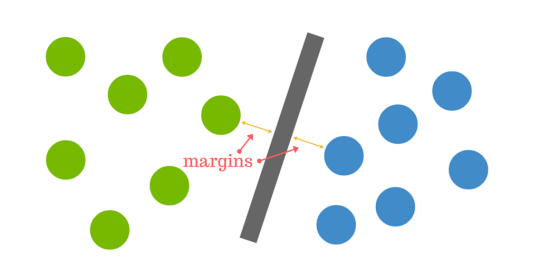

        Podemos considerar neste exemplo de 2 classes que o hiper plano é uma reta. Para encontrar a melhor reta (ou hiper
        plano) que separa os dados o SVM utiliza os Support Vectors que são os pontos mais próximos da reta. A distância 
        entre os Support Vectors e a reta é chamada de margem e o algoritmo tem como objetivo encontrar a reta que fornece 
        o valor mais alto de margem. Logo, para otimizar os resultados escolhemos a reta que possui o maior valor de margem.

      O SVC também pode ser utilizado para solucionar problemas não lineares como o exibido na imagem do lado esquerdo :
      
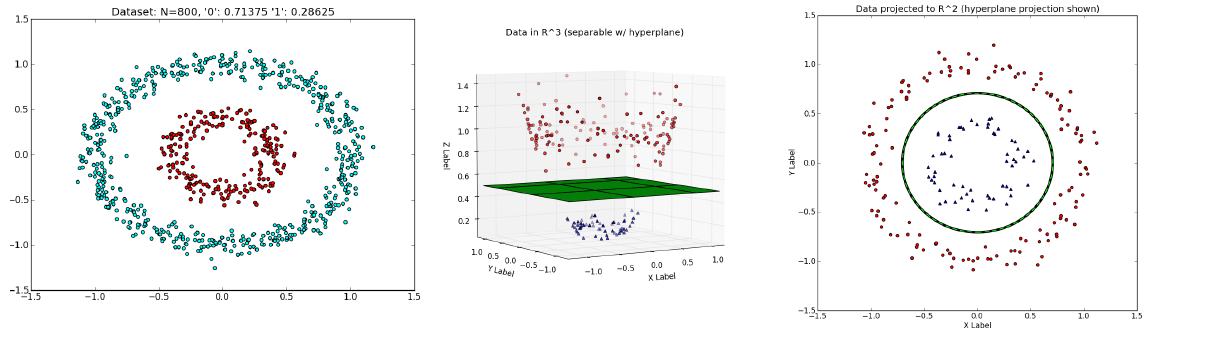

      Neste exemplo temos um caso não linear em duas dimensões e por isso não podemos separar com uma reta, porém projetando 
      os dados em três dimensões conseguimos encontrar um plano que separa os dados em duas classes, como ilustrado na imagem 
      do meio. E após encontrarmos o plano que separa os dados em três dimensões podemos projetar em duas dimensões e
      encontrarmos a melhor separação dos dados, como podemos ver na imagem a esquerda. Essa técnica é possível utilizando o
      kernel que pode ser configurado com uma função que faz a transformação necessária para encontrar a melhor solução. No
      exemplo acima o kernel utilizou uma função que projetou os dados em R³ e encontrou o hiper plano que separa os dados, e
      projetando o resultado em R² temos um círculo separando os dados em duas classes. O link a seguir leva a um vídeo que 
      ilustra o que foi escrito aqui: https://www.youtube.com/watch?v=3liCbRZPrZA
      
      
      Fontes consultadas:
      http://blog.aylien.com/support-vector-machines-for-dummies-a-simple/
      http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick_blog_ekim_12_20_2017.pdf
      https://www.quora.com/What-does-support-vector-machine-SVM-mean-in-laymans-terms
      https://www.reddit.com/r/MachineLearning/comments/15zrpp/please_explain_support_vector_machines_svm_like_i/
      
      

### Implementação: Calibrando o Modelo (_Tuning_)
Calibre o modelo escolhido. Utilize busca em matriz (`GridSearchCV`) com, pelo menos, um parâmetro importante calibrado com, pelo menos, 3 valores diferentes. Você vai precisar utilizar todo o conjunto de treinamento para isso. Na célula de código abaixo, você deve implementar o seguinte:
- Importe [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) e [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Crie o dicionário de parâmetros que você deseja calibrar para o modelo escolhido.
 - Examplo: `parameters = {'parameter' : [list of values]}`.
- Inicialize o classificador que você escolheu e armazene-o em `clf`.
- Crie a função de pontuação F<sub>1</sub> utilizando `make_scorer` e armazene-o em `f1_scorer`.
 - Estabeleça o parâmetro `pos_label` para o valor correto!
- Execute uma busca em matriz no classificador `clf` utilizando o `f1_scorer` como método de pontuação e armazene-o em `grid_obj`.
- Treine o objeto de busca em matriz com os dados de treinamento (`X_train`, `y_train`) e armazene-o em `grid_obj`.

In [14]:
# TODO: Importe 'GridSearchCV' e 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer



# TODO: Crie a lista de parâmetros que você gostaria de calibrar
parameters = [
    {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']},
    {'C': [0.01, 0.1, 1, 10], 'degree':[1, 2, 3], 'kernel': ['poly']},
    {'C': [0.01, 0.1, 1, 10], 'gamma': [0.5, 0.1, 0.01], 'kernel': ['rbf']}
]
# TODO: Inicialize o classificador
clf = svm.SVC(random_state=33)

# TODO: Faça uma função de pontuação f1 utilizando 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Execute uma busca em matriz no classificador utilizando o f1_scorer como método de pontuação
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer)
print "\n"
# TODO: Ajuste o objeto de busca em matriz para o treinamento de dados e encontre os parâmetros ótimos
grid_obj =  grid_obj.fit(X_train, y_train)
print grid_obj
print "\n"
# Get the estimator
clf = grid_obj.best_estimator_
print clf
print "\n"
# Reporte a pontuação final F1 para treinamento e teste depois de calibrar os parâmetrosprint "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "O modelo calibrado tem F1 de {:.4f} no conjunto de treinamento.".format(predict_labels(clf, X_train, y_train))
print "O modelo calibrado tem F1 de {:.4f} no conjunto de teste.".format(predict_labels(clf, X_test, y_test))



GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=33, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10]}, {'kernel': ['poly'], 'C': [0.01, 0.1, 1, 10], 'degree': [1, 2, 3]}, {'kernel': ['rbf'], 'C': [0.01, 0.1, 1, 10], 'gamma': [0.5, 0.1, 0.01]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, pos_label=yes), verbose=0)


SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=33, shrinking=True,
  tol=0.001, verbose=False)


As previsões foram feitas em 0.0050 segundos.
O modelo calibrado tem F1 de 0.8163 no conjunto 

### Questão 5 - Pontuação F<sub>1</sub> Final
*Qual é a pontuação F<sub>1</sub> do modelo final para treinamento e teste? Como ele se compara ao modelo que não foi calibrado?*

# **Resposta: **

Após aplicar o GridSearch os melhores parâmetros encontrados para o SVM foram:

        SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto',
        kernel='linear', max_iter=-1, probability=False, random_state=33, shrinking=True, tol=0.001, verbose=False)
        
A pontuação *F<sub>1</sub>* encontra com o modelo foi de 0.8512 no conjunto de treinamento e 0.7273 no conjunto de teste. 

**SVC sem ser calibrado**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------:
| 300                                |      0.0150          |    0.0000                   |    0.8758                  |        0.7246        |
 
**SVC calibrado**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
     |
| 300                                |      ----          |    0.0000                  |    0.8163                  |        0.8205        |

É possível concluir que existe uma melhoria considerável nos resultados com o modelo SVC calibrado, sendo que o *F<sub>1</sub>* de treinamento melhorou quase 0,1.

**Dúvida: ** Cometi algum equívoco no GridSearch? Não me senti confortável com a pouca melhora no modelo. **respondido na 1° revisão**

**Dúvida: ** Você sugeriu a normalização dos dados para utilizar o SVC, caso eu tenha váriaveis contínuas e discretas, como funciona? Eu teria que combinar preprocessing.scale() em variáveis contínuas e preprocessing.OneHotEncoder() em discretas? 

**Dúvida: ** Seguindo as dicas para selecionar os parâmetros o resultado mudou bastante, o fato de colocar parâmetros desnecessário prejudicou meu resultado?

Antigo:

parameters = {'C':(0.001, 0.01, 1, 10, 100), 'kernel': ('linear', 'poly', 'rbf','sigmoid'),
              'gamma': (1e-5, 1e-4, 1e-3, 1e-2, 1e-1),'tol': (1e-5, 1e-4, 1e-3, 1e-2, 1e-1), 'probability': (True, False)}

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando o iPython Nothebook como um document HTML. Você pode fazer isso utilizando o menu acima e navegando para  
**File -> Download as -> HTML (.html)**. Inclua a documentação final junto com o notebook para o envio do seu projeto.